#Student Name: Abhijit Sinha
#Student ID: 18195067

### Problem Description

A student is writing an exam without proper preparation, but wants a 100 out of 100 score. What are the chances of the score being a perfect 100 if the student tries 100, 1000 and 10000 attempts

### Refection:
- Added a random element by including multiple choice options in the problem. Thanks for Martin Power for sharing the idea.
- Created functions to reuse code for performing multiple tests attempts.

In [1]:
%matplotlib inline

import numpy as np
import random as random
import matplotlib.pyplot as plt

In [2]:
def random_test(num_trials):
    """Function to randomly shuffle the test answers and returns the samples with correct answer"""
    
    samples = []
    for i in range(num_trials):
        correct_answers = 0
        
        for j in range(num_questions):
            correct_answer = random.choice(sample_space)
            student_guess = random.choice(sample_space)
            
            if student_guess == correct_answer:
                correct_answers += 1
            samples.append(correct_answers)
            
    return samples


def plot_histogram(samples, num_bins):
    """Plot a histogram for the list of samples"""

    plt.title("Chances of getting a perfect Score")
    plt.hist(samples, num_bins, facecolor='blue', label="Exam score")
    plt.show()
    
    
def simulate_test(attempts):
    """Function to simulate the attempts a student takes for the test"""
    test_result = random_test(attempts)

    # Mean
    mean = np.mean(test_result)
    print("Mean of Samples: ", mean)

    # Standard deviation
    std_deviation = np.std(test_result)
    print("Standard Deviation: ", std_deviation)
    
    # Plot histogram
    plot_histogram(test_result, num_questions)


Mean of Samples:  12.7509
Standard Deviation:  7.921985179864956


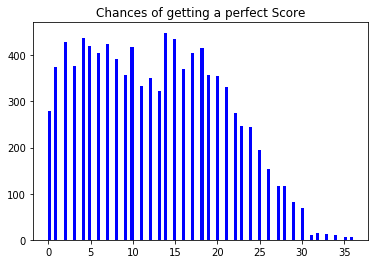

In [3]:
# Test parameters
sample_space = ["a", "b", "c", "d"]
num_questions = 100


# Run the experiment for 100 attempts
simulate_test(100)


Mean of Samples:  12.60903
Standard Deviation:  7.8047083519565295


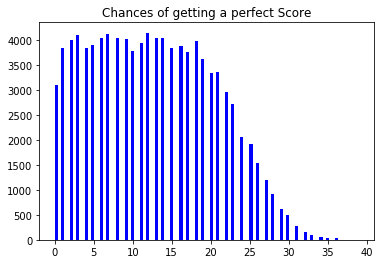

In [4]:
# Run the experiment for 1000 attempts
simulate_test(1000)

Mean of Samples:  12.629236
Standard Deviation:  7.836800115883014


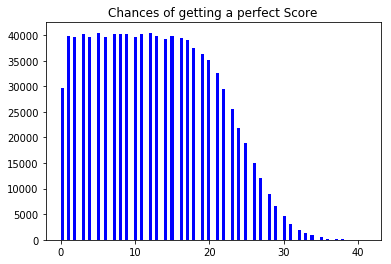

In [5]:
# Run the experiment for 10000 attempts
simulate_test(10000)